### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:$$f(x)=4-3x-2x^2+3x^3$$
for $x \in [-1,1]$.

In order to make practice with NN, explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Make graphs comparing fits for different NNs.
Check your NN models by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

Sono stati eseguiti 5 allenamenti di 5 reti neurali diverse:
- le prime tre sono stati fatti con lo stesso numero di layer (4) e di neuroni per layer (20) ma modificando funzioni di attivazione e ottimizzatori.
- gli ultimi tre traning sono stati fatti con la funzione di attivazione e l'ottimizzatore più prestanti (relu, sgd) e modificando il numero di layer e di neuroni per layer

<img src="pictures/ex11_1_1.png" width="50%">
<img src="pictures/ex11_1_2.png" width="50%">
<img src="pictures/ex11_1_3.png" width="50%">
<img src="pictures/ex11_1_4.png" width="50%">
<img src="pictures/ex11_1_5.png" width="50%">


Ossserviamo che la capacità della rete di ottimizzarsi dipende fortemente dal numero di layer utilizzati infatti il miglrio fit ottenuto è dato dalla rete con pochi neuroni per layer ma con un numero elevato di strati (immagine 4). Osserviamo anche che per quanto si possa migliorare la capacità della rete di fittare dati appartenenti all'intervanno di training, la capacità di predirre dati al di fuori di questo intervallo rimane sempre molto scarsa. Questo non stupisce però se si nota che l'abilità della rete costruita non sta nel ricavare una *legge* che genera una distribuzione di dati come quela osservata (che basandosi su princi più generali è in grando di fare predizioni su dati mai visti), ma ricerca solo la correlazione statisticamnete più stretta tra i dati osservati quindi la sua capacità di generalizzazione al di fuori dell'invervallo di allenamento sarà sempre scarsa.

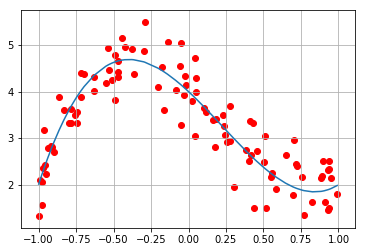

In [35]:
import numpy as np
a=4
b=-3
c=-2
d=3
def f (x,a,b,c,d):
    return a+ b*x +c*x**2 +d*x**3
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = a+ b*x_valid +c*x_valid**2 +d*x_valid**3 # ideal (target) polinomial function

sigma = 0.5# noise standard deviation, for the moment it is absent
y_train = np.random.normal(f(x_train,a,b,c,d), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(f(x_valid,a,b,c,d), sigma)

# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

In [38]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(500, input_shape=(1,)))
model.add(Dense(500, activation='relu'))
model.add(Dense(1))
# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 500)               1000      
_________________________________________________________________
dense_48 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 501       
Total params: 252,001
Trainable params: 252,001
Non-trainable params: 0
_________________________________________________________________


In [39]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=60,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 1000 samples, validate on 100 samples
Epoch 1/60
1000/1000 [==============================] - 1s 1ms/sample - loss: 3.5544 - mean_squared_error: 3.5544 - val_loss: 1.0327 - val_mean_squared_error: 1.0327
Epoch 2/60
1000/1000 [==============================] - 0s 488us/sample - loss: 0.8256 - mean_squared_error: 0.8256 - val_loss: 1.0864 - val_mean_squared_error: 1.0864
Epoch 3/60
1000/1000 [==============================] - 0s 452us/sample - loss: 0.7783 - mean_squared_error: 0.7783 - val_loss: 1.0718 - val_mean_squared_error: 1.0718
Epoch 4/60
1000/1000 [==============================] - 1s 642us/sample - loss: 0.7435 - mean_squared_error: 0.7435 - val_loss: 0.9466 - val_mean_squared_error: 0.9466
Epoch 5/60
1000/1000 [==============================] - 1s 606us/sample - loss: 0.7055 - mean_squared_error: 0.7055 - val_loss: 0.8383 - val_mean_squared_error: 0.8383
Epoch 6/60
1000/1000 [==============================] - 1s 591us/sample - loss: 0.6691 - mean_squared_error: 0.6691

In [40]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

weigths =  [array([[-0.00166867, -0.07834964,  0.13568926,  0.03196172,  0.05131691,
        -0.07385582, -0.02407927, -0.08023025,  0.02582907, -0.02239371,
        -0.14640436,  0.15725175,  0.04037903, -0.06093045,  0.06158258,
         0.01106735,  0.17028393, -0.01589809,  0.0314886 , -0.11799093,
        -0.02426076,  0.15881285,  0.2206567 ,  0.18574145,  0.01148073,
        -0.08717588,  0.09134407, -0.08748078, -0.11773071, -0.08436718,
         0.09703848, -0.16349128,  0.08330609,  0.17350043,  0.00795116,
        -0.14544784, -0.1222053 ,  0.06636312, -0.15056193,  0.09407529,
         0.05914054,  0.00140457, -0.09015708,  0.09693066, -0.11430331,
        -0.01777679,  0.03604307, -0.0831245 , -0.1289176 , -0.04257393,
         0.08872607, -0.00073405,  0.12382237,  0.00096687, -0.02712168,
        -0.13787746,  0.06041035, -0.0265361 , -0.01561621,  0.08989891,
        -0.00798555, -0.10042088, -0.11685771, -0.06445597, -0.02793467,
        -0.10109542, -0.03499583, -0.11

100/100 [==============================] - 0s 668us/sample - loss: 0.2321 - mean_squared_error: 0.2321

Test loss: 0.23210729241371156
Test accuracy: 0.2321073


In [41]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

100/100 [==============================] - 0s 535us/sample - loss: 0.0226 - mean_squared_error: 0.0226

Test loss: 0.022618537396192552
Test accuracy: 0.022618538


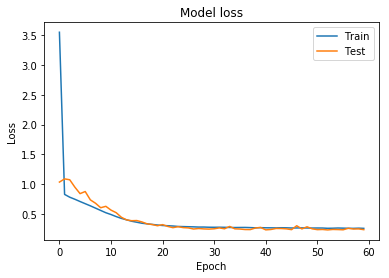

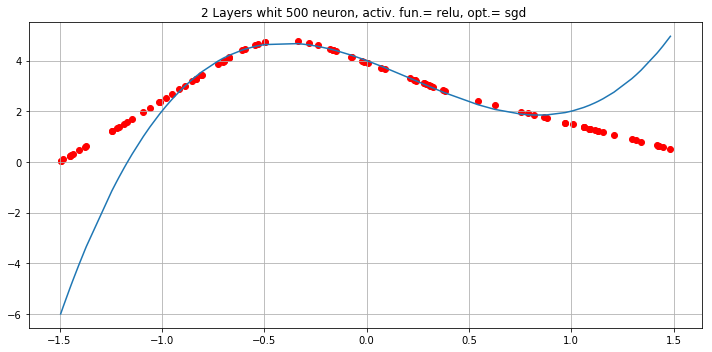

In [42]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

fig=plt.figure(figsize=(10, 5))
x_predicted = np.random.uniform(-1.5, 1.5, 100)
x_predicted.sort()
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_predicted, f(x_predicted,a,b,c,d))
plt.title("2 Layers whit 500 neuron, activ. fun.= relu, opt.= sgd ")
plt.grid(True)
plt.tight_layout()
plt.savefig("./pictures/ex11_1_5.png")

plt.show()